Trong jupyter này, chúng ta sẽ làm quen với các thống kê Mô tả bao gồm các khái niệm, thuật ngữ, biện pháp và công cụ giúp mô tả, hiển thị và tóm tắt dữ liệu một cách có ý nghĩa. Khi phân tích dữ liệu, chẳng hạn như giá thuê căn hộ mỗi năm, có thể sử dụng cả số liệu thống kê mô tả và suy luận để phân tích kết quả và đưa ra một số kết luận. Chúng tôi sẽ thảo luận về các khái niệm, thuật ngữ và thủ tục cơ bản, như trung bình, trung vị, phương sai, tương quan, v.v., để khám phá, mô tả và tóm tắt tập dữ liệu đã cho.

# 1. Thống kê mô tả 
1.1 Getting data <br/>
1.2 Data preparation <br/>
1.3 Improving data as a pandas DataFrame <br/>
1.4 Data clearning <br/>

# 1.1 Getting data
The adult example

Bộ data này xấp xỉ 32000 mẫu quan sát khác nhau về dân số US: tuổi, giới tính, tình trạng hôn nhân, quê quán, thu nhập, giáo dục, nghề nghiệp...<br/>
Chúng ta sẽ khám phá data này và trả lời câu hỏi như là: "Có phải là đàn ông có thu nhập cao hơn phụ nữ, ví dụ để nhận được trên 50000$ mỗi năm?"<br/>
Chi tiết xem tại: https://archive.ics.uci.edu/ml/datasets/Adult

# 1.2 Data preparation

In [1]:
file = open('./files/ch03/adult.data','r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0
data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1], chr_int(data1[2]), data1[3],chr_int(data1[4]), data1[5],data1[6], data1[7], data1[8], data1[9], chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13], data1[14] ])

In [2]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


## 1.3 Importing data as a pandas DataFrame

Một trong những cách dễ quả lý dữ liệu trong python là sử dụng <i>DataFrame</i>, được định nghĩa trong thư viện <i>Pandas</i>. Không gian 2 chiều, kích cỡ có thể thay đổi, có khả năng không đồng nhất cấu trúc bảng với các trục:

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df.columns =  [
'age', 'type_employer', 'fnlwgt',
'education', 'education_num', 'marital',
'occupation','relationship', 'race',
'sex', 'capital_gain', 'capital_loss',
'hr_per_week', 'country', 'income'
]

In [4]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [5]:
df.shape

(32561, 15)

Đếm số item trên mỗi country:

In [6]:
counts = df.groupby('country').size()
counts

country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

Đếm số item theo tuổi:

In [7]:
counts = df.groupby('age').size()
counts

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64

chia người thành 2 nhóm: men và women

In [8]:
ml = df[(df.sex == 'Male')]
ml1 = df[(df.sex == 'Male') & (df.income == '>50K\n')]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female') & (df.income == '>50K\n')]

In [9]:
# Tóm tắt data
df1 = df[(df.income == '>50K\n')]
print("Tỷ lệ người thu nhập cao:",int(len(df1)/float(len(df))*100))
print("Tỷ lệ đàn ông thu nhập cao:",int(len(ml1)/float(len(ml))*100))
print("Tỷ lệ phụ nữ thu nhập cao:",int(len(fm1)/float(len(fm))*100))

Tỷ lệ người thu nhập cao: 24
Tỷ lệ đàn ông thu nhập cao: 30
Tỷ lệ phụ nữ thu nhập cao: 10


## 1.4 Data Cleaning
Các bước phổ biến nhất là:
+ **Spample the data (Lấy mẫu dữ liệu)**: Nếu số lượng dữ liệu thô là rất lớn, việc xử lý tất cả chúng có thể đòi hỏi một lượng lớn khả năng xử lý có thể không thực tế.  Trong trường hợp này, việc lấy mẫu dữ liệu đầu vào để giảm kích thước dữ liệu cần xử lý là khá phổ biến.
+ **Impute missing data**: Điều khá phổ biến là một số bản ghi đầu vào không đầy đủ theo nghĩa là các trường nhất định bị thiếu hoặc có lỗi đầu vào.  Trong định dạng dữ liệu dạng bảng điển hình, chúng ta cần xác thực mỗi bản ghi chứa cùng một số trường và mỗi trường chứa loại dữ liệu mà chúng ta mong đợi.  Trong trường hợp bản ghi bị thiếu một số trường, chúng tôi có các lựa chọn sau: 
<small>
* (a) Hủy toàn bộ bản ghi nếu nó không đầy đủ;  

* (b) Suy ra giá trị còn thiếu dựa trên dữ liệu từ các bản ghi khác.  Một cách tiếp cận phổ biến là điền vào dữ liệu còn thiếu với mức trung bình hoặc trung bình.
</small>

* **Chuẩn hóá giá trị**: chuẩn hóa dữ liệu về một khoảng
* **Giảm chiều**
* **Thêm đặc trưng dẫn xuất**
* **Phân biệt gía trị thành các danh mục (categorical)**
* **Phân loại nhị phân**: Một số mô hình học máy nhất định chỉ nhận đầu vào nhị phân (hoặc đầu vào số).  Trong trường hợp này, chúng ta cần chuyển đổi thuộc tính phân loại thành nhiều thuộc tính nhị phân, trong khi mỗi thuộc tính nhị phân tương ứng với một giá trị cụ thể của danh mục.
* **Chọn, tổ hợp, tổng hợp dữ liệu**: Thiết kế dạng dữ liệu huấn luyện là phần quan trọng nhất trong toàn bộ bài tập mô hình dự đoán bởi vì độ chính xác chủ yếu phụ thuộc vào việc các đặc trưng đầu vào có được cấu trúc ở dạng thích hợp cung cấp tín hiệu mạnh cho thuật toán học hay không.  Thay vì sử dụng dữ liệu thô như hiện tại, điều khá phổ biến là nhiều phần dữ liệu thô cần được kết hợp với nhau hoặc tổng hợp nhiều bản ghi dữ liệu thô dọc theo một số chiều.

# 2. Phân tích thăm dò dữ liệu
## 2.1 Tóm tắt dữ liệu 

In [10]:
# Mean
print("Trung bình tuổi đàn ông:",ml['age'].mean())
print("Trung bình tuổi phụ nữ:",fm['age'].mean())
print("Trung bình tuổi đàn ông có thu nhập cao:",ml1['age'].mean())
print("Trung bình tuổi phụ nữ có thu nhập cao:",fm1['age'].mean())

Trung bình tuổi đàn ông: 39.43354749885268
Trung bình tuổi phụ nữ: 36.85823043357163
Trung bình tuổi đàn ông có thu nhập cao: 44.62578805163614
Trung bình tuổi phụ nữ có thu nhập cao: 42.125530110262936


In [11]:
# Variance
print("Variance tuổi đàn ông:",ml['age'].var())
print("Variance tuổi phụ nữ:",fm['age'].var())
print("Variance tuổi đàn ông có thu nhập cao:",ml1['age'].var())
print("Variance tuổi phụ nữ có thu nhập cao:",fm1['age'].var())
# Std
print("Std tuổi đàn ông:",ml['age'].std())
print("Std tuổi phụ nữ:",fm['age'].std())
print("Std tuổi đàn ông có thu nhập cao:",ml1['age'].std())
print("Std tuổi phụ nữ có thu nhập cao:",fm1['age'].std())
# Median
print("Median tuổi đàn ông:",ml['age'].median())
print("Median tuổi phụ nữ:",fm['age'].median())
print("Median tuổi đàn ông có thu nhập cao:",ml1['age'].median())
print("Median tuổi phụ nữ có thu nhập cao:",fm1['age'].median())

Variance tuổi đàn ông: 178.77375174529985
Variance tuổi phụ nữ: 196.3837063948063
Variance tuổi đàn ông có thu nhập cao: 109.94506674864569
Variance tuổi phụ nữ có thu nhập cao: 109.41377041059515
Std tuổi đàn ông: 13.370630192526448
Std tuổi phụ nữ: 14.013697099438332
Std tuổi đàn ông có thu nhập cao: 10.485469314658532
Std tuổi phụ nữ có thu nhập cao: 10.460103747601892
Median tuổi đàn ông: 38.0
Median tuổi phụ nữ: 35.0
Median tuổi đàn ông có thu nhập cao: 44.0
Median tuổi phụ nữ có thu nhập cao: 41.0


In [12]:
ml_mu_hr = ml['hr_per_week'].mean()
fm_mu_hr = fm['hr_per_week'].mean()
ml_var_hr = ml['hr_per_week'].var()
fm_var_hr = fm['hr_per_week'].var()
ml_std_hr = ml['hr_per_week'].std()
fm_std_hr = fm['hr_per_week'].std()
print('Thống kế số giờ làm việc trên tuần của đàn ông: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print('Thống kê số giờ làm việc trên tuần của phụ nữ: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)

Thống kế số giờ làm việc trên tuần của đàn ông: mu: 42.42808627810923 var: 146.88846717140746 std: 12.11975524387384
Thống kê số giờ làm việc trên tuần của phụ nữ: mu: 36.410361154953115 var: 139.50679700047422 std: 11.811299547487323


## 2.2 Histogram

Vẽ đồ thị histogram để xem phân phối dữ liệu.

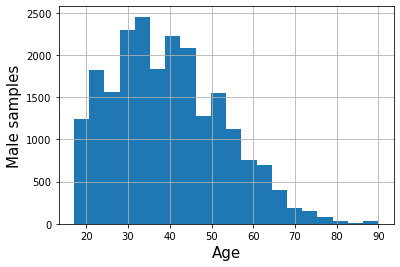

In [13]:
import matplotlib.pyplot as plt
ml_age = ml['age']
ml_age.hist(histtype = 'stepfilled', bins = 20)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Male samples', fontsize=15)
plt.show()

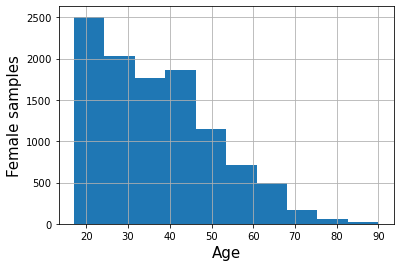

In [14]:
fm_age = fm['age']
fm_age.hist(histtype = 'stepfilled', bins = 10)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Female samples', fontsize=15)
plt.show()

Nếu chúng ta muốn so sánh, chúng ta có thể vẽ các biểu đồ trên cùng 1 đồ thị như sau:

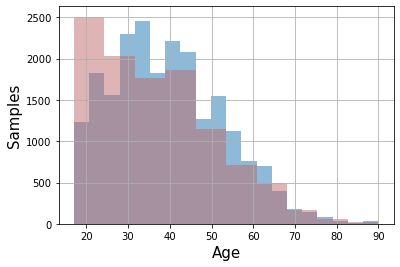

In [15]:
import seaborn as sns

ml_age.hist(histtype = 'stepfilled', alpha=0.5, bins = 20)
fm_age.hist(histtype = 'stepfilled', alpha=0.5, bins = 10, color=sns.desaturate("indianred",0.75))

plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

## 2.3 Data Distributions
Chúng ta có thể chuẩn hóa hóa tần số của biểu đồ bằng cách chia / chuẩn hóa cho $n$ - số lượng mẫu.  Biểu đồ chuẩn hóa được gọi là Hàm xác suất khối (PMF).

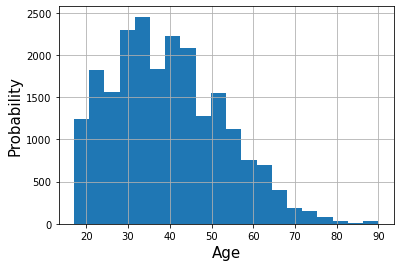

In [16]:
ml_age.hist(histtype='stepfilled',bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

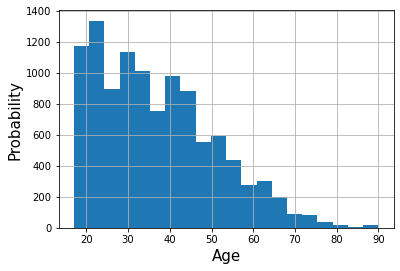

In [17]:
fm_age.hist(histtype='stepfilled', bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

Hàm phân bố xác suất PDF:

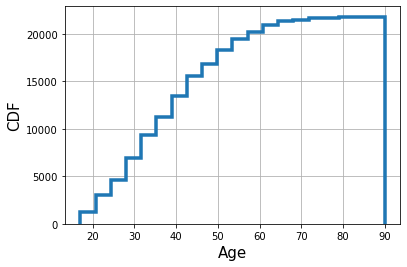

In [18]:
ml_age.hist(histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

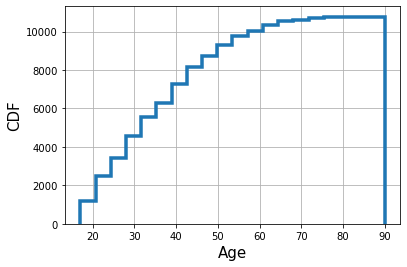

In [19]:
fm_age.hist(histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

<AxesSubplot:>

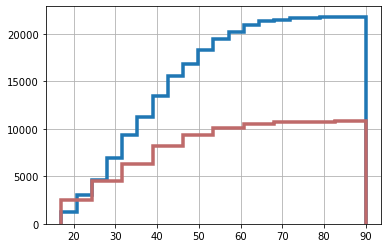

In [20]:
ml_age.hist(histtype = 'step', cumulative = True, linewidth = 3.5, bins = 20)
fm_age.hist(histtype = 'step', cumulative = True, linewidth = 3.5, bins = 10, color=sns.desaturate("indianred",0.75))

In [21]:
print("Chênh lệch kỳ vọng:", ml_age.mean() - fm_age.mean())

Chênh lệch kỳ vọng: 2.5753170652810553


## 2.4 Ngoại lệ (outliers)
Chúng ta có thể tìm ra các ngoại lệ bằng cách: 
- Tính toán các mẫu ở xa trung vị.  
- Tính toán các mẫu có giá trị vượt quá giá trị trung bình 2 hoặc 3 lần độ lệch chuẩn.

In [22]:
df['age'].median()

37.0

Tìm số ngoại lệ:

In [23]:
len(df[(df.income=='>50K\n') & (df['age'] < df['age'].median() - 15)])

5

In [24]:
len(df[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35)])

69

Nếu coi ngoại lệ như là lỗi, có thể tùy chọn bằng cách bỏ chúng đi:

In [25]:
df2 = df.drop(df.index[(df.income=='>50K\n') & (df['age']>df['age'].median() + 35) & (df['age'] > df['age'].median() -15)])
df2.shape

(32492, 15)

In [26]:
ml1_age=ml1['age']
fm1_age=fm1['age']

ml2_age = ml1_age.drop(ml1_age.index[(ml1_age > df['age'].median() + 35) & (ml1_age > df['age'].median() - 15)])
fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > df['age'].median() + 35) & (fm1_age > df['age'].median() - 15)])

In [27]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
# Computing the mean, std, median, min and max for the high-income male population
print("Men statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", ml2_age.min(), "Max:", ml2_age.max())

Men statistics: Mean: 44.317982123920615 Std: 10.019749857171409 Median: 44.0 Min: 19 Max: 72


In [28]:
mu3ml = fm2_age.mean()
std3ml = fm2_age.std()
md3ml = fm2_age.median()
# Computing the mean, std, median, min and max for the high-income female population
print("Women statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", fm2_age.min(), "Max:", fm2_age.max())

Women statistics: Mean: 44.317982123920615 Std: 10.019749857171409 Median: 44.0 Min: 19 Max: 72


In [29]:
print('The mean difference with outliers is: %4.2f.' % (ml_age.mean() - fm_age.mean()))
print("The mean difference without outliers is: %4.2f." % (ml2_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


Hãy so sánh trực quan các phân phối tuổi trước và sau khi xóa các ngoại lệ:|

Text(0.5, 0, 'Samples')

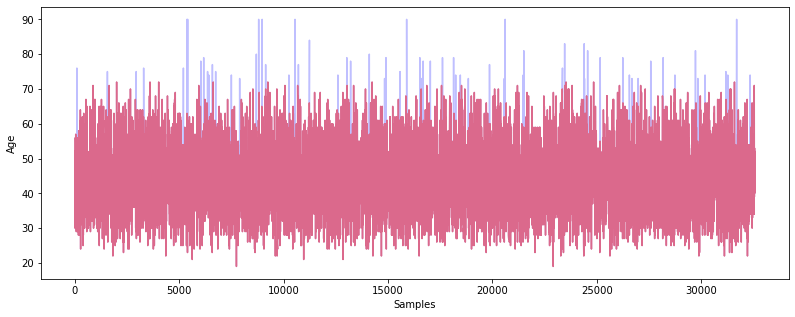

In [30]:
plt.figure(figsize=(13.4,5))

df.age[(df.income == '>50K\n')].plot(alpha=.25, color='blue')
df2.age[(df2.income == '>50K\n')].plot(alpha=.45,color='red')

plt.ylabel('Age')
plt.xlabel('Samples')

Quan sát sự khác nhau giữa chênh lệch nam và nữ trong dữ liệu đã làm sạch:

<ipython-input-31-aa1cf42752a5>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  countx,divisionx = np.histogram(ml2_age, normed=True)
<ipython-input-31-aa1cf42752a5>:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  county,divisiony = np.histogram(fm2_age, normed=True)


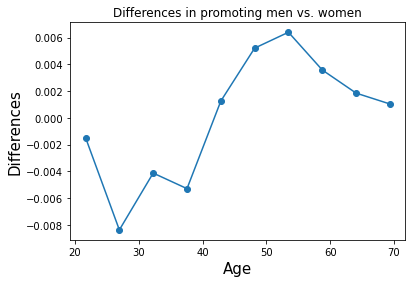

In [31]:
import matplotlib.pyplot as plt
import numpy as np

countx,divisionx = np.histogram(ml2_age, normed=True) 
county,divisiony = np.histogram(fm2_age, normed=True)

val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-') 
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show()

## 2.5 Measuring asymmetry (optinal)

Skewness là một số liệu thống kê đo lường sự bất đối xứng của tập hợp các mẫu dữ liệu $x_i$:
$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

Tử số là độ lệch bình phương trung bình (hoặc phương sai) và mẫu số là độ lệch trung bình khối.

Độ lệch âm biểu thị rằng phân phối "lệch trái" (nó kéo dài ra bên trái hơn bên phải).

Skewness có thể bị ảnh hưởng bởi các ngoại lệ !!!  Một cách khác đơn giản hơn là xem xét mối quan hệ giữa giá trị trung bình ($μ$) và trung vị ($μ_{\frac{1}{2}}$).

In [32]:
ml2_age

7        52
9        42
10       37
11       30
14       40
         ..
32532    34
32533    54
32539    71
32554    53
32557    40
Name: age, Length: 6601, dtype: int64

In [33]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

print("The skewness of the male population is:", skewness(ml2_age))
print("The skewness of the female population is:", skewness(fm2_age))

The skewness of the male population is: 0.26644438384328223
The skewness of the female population is: 0.3863335249128606


Dân số nữ bị lệch nhiều hơn nam giới, có lẽ vì nam giới
có thể dễ nghỉ hưu muộn hơn so với phụ nữ.

**Pearson's median skewness coefficient** là một thay thế mạnh mẽ hơn:
$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

In [34]:
def pearson(x):
    return 3*(x.mean()-x.median())/x.std()

print("The Pearson's coefficient of the male population is:", pearson(ml2_age))
print("The Pearson's coefficient of the female population is:", pearson(fm2_age))

The Pearson's coefficient of the male population is: 0.09520660549016392
The Pearson's coefficient of the female population is: 0.2621531209596967


Sau khi khám phá dữ liệu, tuổi trung bình của nam giới trong tập dữ liệu của chúng tôi là 39,4 ; trong khi đối với phụ nữ là 36,8 Khi phân tích mức lương thu nhập cao, tuổi trung bình của nam giới tăng lên 44,6 tuổi; trong khi đối với phụ nữ, tăng lên 42,1 năm.

Khi dữ liệu được xóa khỏi các ngoại lệ, chúng tôi thu được tuổi trung bình cho thu nhập cao nam: 44,3 và nữ: 41,8.